<a href="https://colab.research.google.com/github/Saravanan-039/UsedCarPricePrediction/blob/main/CarPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df=pd.read_csv('car_prices.csv')

In [ ]:
df.head()


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50


In [ ]:
# Basic statistics
summary_stats = df.describe(include='all')

# Checking for missing values
missing_values = df.isnull().sum()

summary_stats, missing_values


(         Unnamed: 0                    Name Location         Year  \
 count   5847.000000                    5847     5847  5847.000000   
 unique          NaN                    1804       11          NaN   
 top             NaN  Mahindra XUV500 W8 2WD   Mumbai          NaN   
 freq            NaN                      49      762          NaN   
 mean    3013.181461                     NaN      NaN  2013.448435   
 std     1736.398890                     NaN      NaN     3.194949   
 min        1.000000                     NaN      NaN  1998.000000   
 25%     1509.500000                     NaN      NaN  2012.000000   
 50%     3015.000000                     NaN      NaN  2014.000000   
 75%     4517.500000                     NaN      NaN  2016.000000   
 max     6018.000000                     NaN      NaN  2019.000000   
 
         Kilometers_Driven Fuel_Type Transmission Owner_Type    Mileage  \
 count        5.847000e+03      5847         5847       5847       5845   
 unique 

In [ ]:
# Drop unnecessary columns
df.drop(columns=['Unnamed: 0', 'New_Price'], inplace=True)

# Convert Mileage, Engine, and Power to numerical values by removing units
df['Mileage'] = df['Mileage'].str.split().str[0].astype(float)
df['Engine'] = df['Engine'].str.split().str[0].astype(float)
df['Power'] = df['Power'].str.replace('null bhp', 'NaN').str.split().str[0].astype(float)

# Handle missing values: For now, we'll fill missing values with the median of the respective columns
df['Mileage'].fillna(df['Mileage'].median(), inplace=True)
df['Engine'].fillna(df['Engine'].median(), inplace=True)
df['Power'].fillna(df['Power'].median(), inplace=True)
df['Seats'].fillna(df['Seats'].median(), inplace=True)

df.head()


<ipython-input-9-da1b247f4728>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Mileage'].fillna(df['Mileage'].median(), inplace=True)
<ipython-input-9-da1b247f4728>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
1,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13.00,1199.0,88.70,5.0,4.50
2,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
3,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
4,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


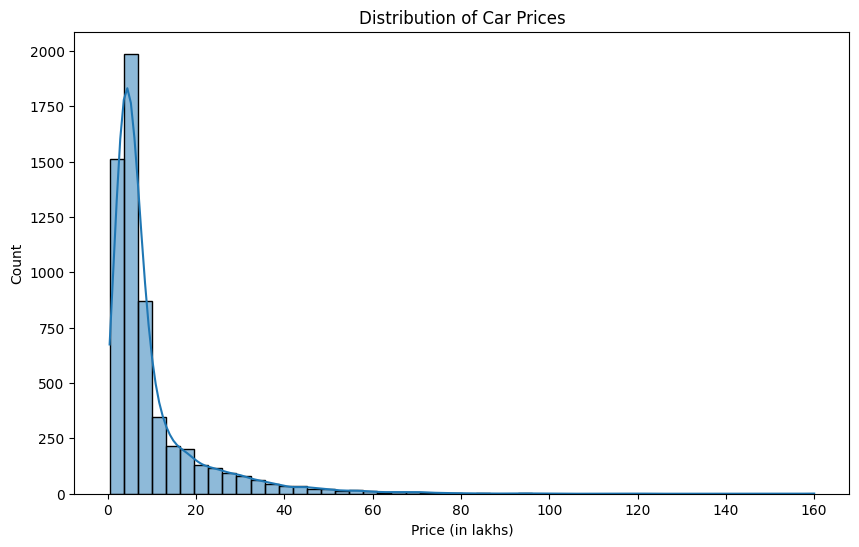

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price (in lakhs)')
plt.ylabel('Count')
plt.show()

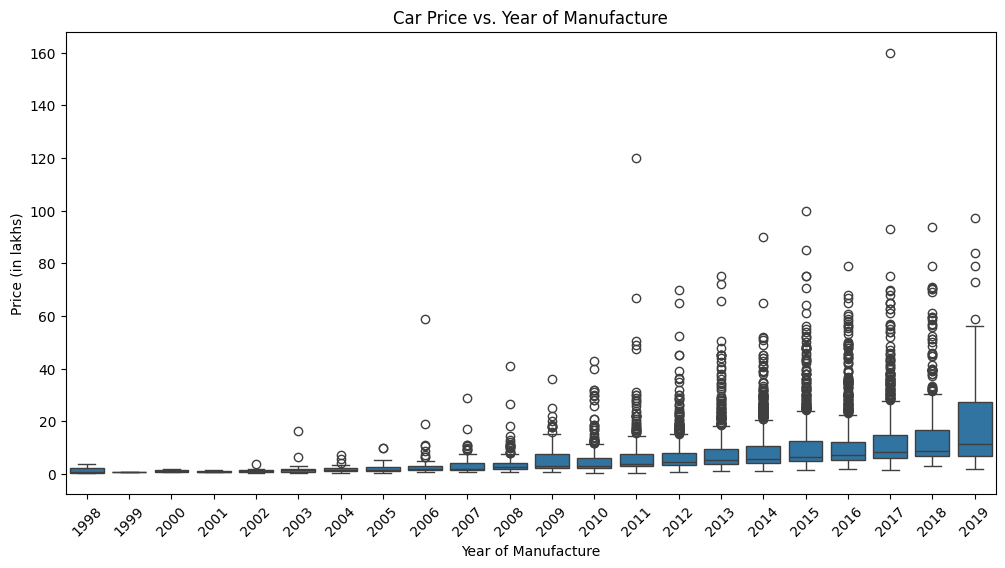

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Year'], y=df['Price'])
plt.title('Car Price vs. Year of Manufacture')
plt.xlabel('Year of Manufacture')
plt.ylabel('Price (in lakhs)')
plt.xticks(rotation=45)
plt.show()

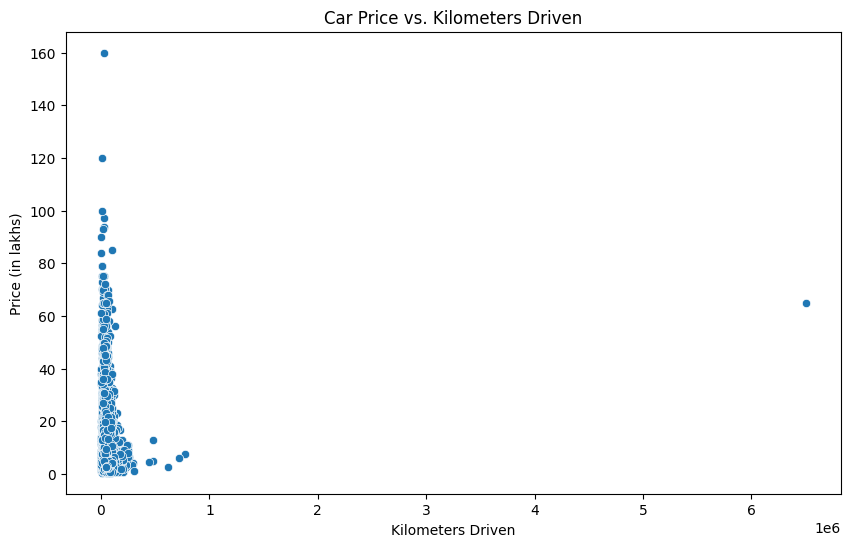

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Kilometers_Driven'], y=df['Price'])
plt.title('Car Price vs. Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price (in lakhs)')
plt.show()


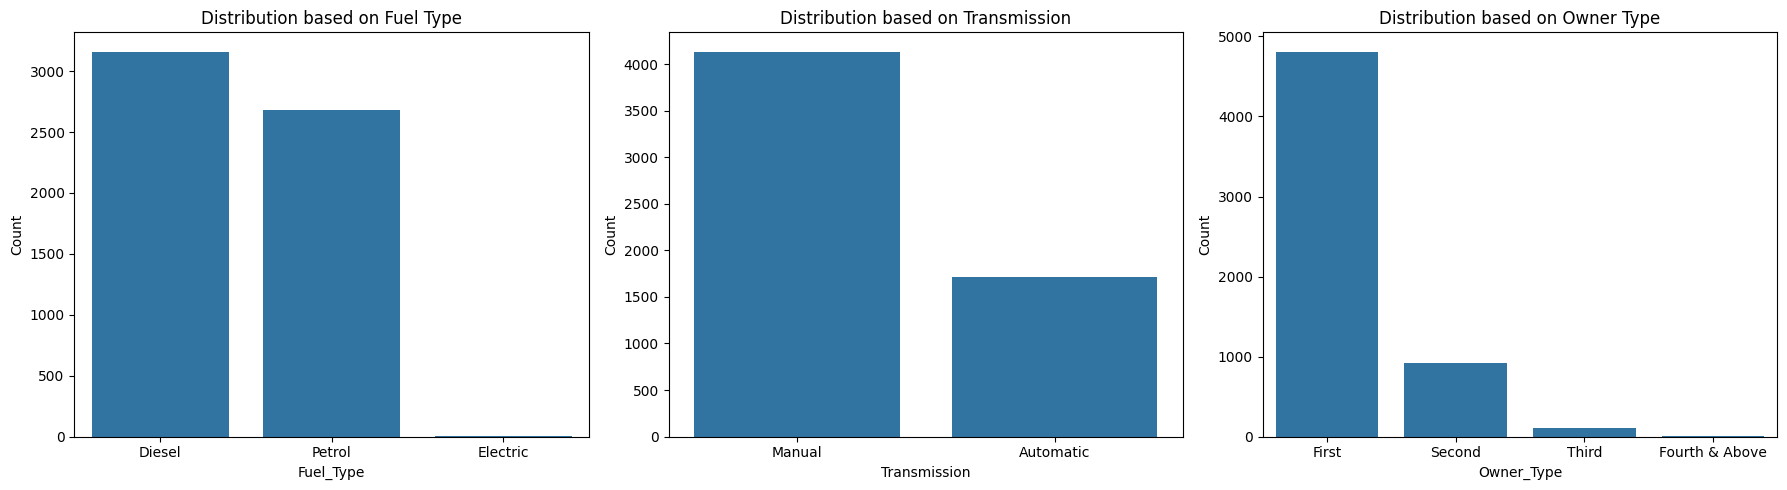

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

sns.countplot(data=df, x='Fuel_Type', ax=axes[0])
axes[0].set_title('Distribution based on Fuel Type')
axes[0].set_ylabel('Count')

sns.countplot(data=df, x='Transmission', ax=axes[1])
axes[1].set_title('Distribution based on Transmission')
axes[1].set_ylabel('Count')

sns.countplot(data=df, x='Owner_Type', ax=axes[2], order=df['Owner_Type'].value_counts().index)
axes[2].set_title('Distribution based on Owner Type')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

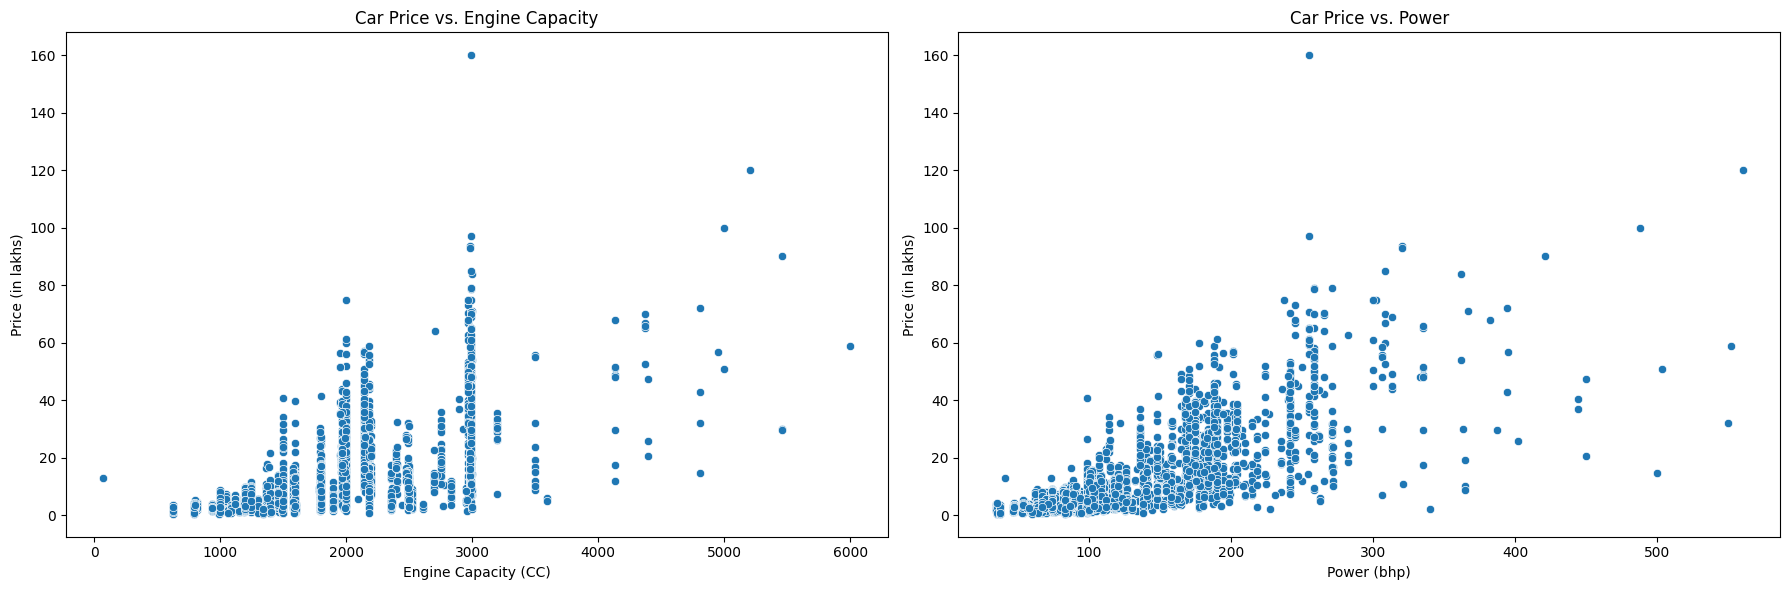

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.scatterplot(data=df, x='Engine', y='Price', ax=axes[0])
axes[0].set_title('Car Price vs. Engine Capacity')
axes[0].set_xlabel('Engine Capacity (CC)')
axes[0].set_ylabel('Price (in lakhs)')

sns.scatterplot(data=df, x='Power', y='Price', ax=axes[1])
axes[1].set_title('Car Price vs. Power')
axes[1].set_xlabel('Power (bhp)')
axes[1].set_ylabel('Price (in lakhs)')

plt.tight_layout()
plt.show()

In [ ]:
# One-hot encoding of categorical variables
data_encoded = pd.get_dummies(df, columns=['Location', 'Fuel_Type', 'Transmission', 'Owner_Type'], drop_first=True)

data_encoded.head()

,Name,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Bangalore,Location_Chennai,...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Electric,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,Hyundai Creta 1.6 CRDi SX Option,2015,41000,19.67,1582.0,126.20,5.0,12.50,False,False,...,False,False,False,True,False,False,True,False,False,False
1,Honda Jazz V,2011,46000,13.00,1199.0,88.70,5.0,4.50,False,True,...,False,False,False,False,False,True,True,False,False,False
2,Maruti Ertiga VDI,2012,87000,20.77,1248.0,88.76,7.0,6.00,False,True,...,False,False,False,False,False,False,True,False,False,False
3,Audi A4 New 2.0 TDI Multitronic,2013,40670,15.20,1968.0,140.80,5.0,17.74,False,False,...,False,False,False,False,False,False,False,False,True,False
4,Nissan Micra Diesel XV,2013,86999,23.08,1461.0,63.10,5.0,3.50,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets
X = data_encoded.drop(columns=['Name', 'Price'])
y = data_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((4677, 22), (1170, 22))

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5], X_test_scaled[:5]  # Display the first 5 rows of the scaled data

(array([[-1.39307753e+00,  6.82785262e-01, -1.69783345e+00,
          1.46045100e+00,  1.89894462e+00, -3.49679450e-01,
         -2.48976105e-01, -3.09148401e-01, -3.45206119e-01,
         -3.19009066e-01, -3.73657441e-01, -2.74175881e-01,
         -3.42094868e-01, -3.21038997e-01,  2.60672208e+00,
         -3.32659812e-01, -2.06835076e-02,  1.08928222e+00,
         -1.54330125e+00, -3.87160088e-02, -4.34239758e-01,
         -1.36053126e-01],
        [ 4.90628037e-01, -6.52695779e-02, -5.01451436e-01,
          9.24985229e-01,  4.92297142e-01,  2.14338578e+00,
         -2.48976105e-01, -3.09148401e-01, -3.45206119e-01,
         -3.19009066e-01, -3.73657441e-01, -2.74175881e-01,
         -3.42094868e-01, -3.21038997e-01, -3.83623558e-01,
         -3.32659812e-01, -2.06835076e-02, -9.18035728e-01,
          6.47961635e-01, -3.87160088e-02, -4.34239758e-01,
         -1.36053126e-01],
        [-2.02097938e+00, -3.57410973e-02, -1.14565713e+00,
         -2.26771330e-01, -3.70446643e-01, -3.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test_scaled)

# Calculate performance metrics
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

mae, mse, rmse, r2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(3.6488075577366224, 31.45355672481212, 5.6083470581635835, 0.730494659704187)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Use cross-validation to evaluate the model's performance
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='r2')

cv_scores, cv_scores.mean(), cv_scores.std()

(array([0.90648877, 0.85652387, 0.89103242, 0.8970405 , 0.83092321]),
 0.8764017553939116,
 0.02831491173537564)

In [ ]:
# 1. Compute the car age
df['Car_Age'] = 2023 - df['Year']  # Assuming the current year is 2023

# 2. Calculate the mileage-to-engine ratio and power-to-engine ratio
df['Mileage_to_Engine_Ratio'] = df['Mileage'] / df['Engine']
df['Power_to_Engine_Ratio'] = df['Power'] / df['Engine']

# 3. Extract the brand of the car from the Name column
df['Brand'] = df['Name'].str.split().str[0]

# 4. Determine if a car is vintage
df['Is_Vintage'] = df['Car_Age'].apply(lambda x: 1 if x > 25 else 0)

# 5. Compute kilometers driven per year
df['Kms_per_Year'] = df['Kilometers_Driven'] / df['Car_Age']

# Encoding the new categorical variable 'Brand' using one-hot encoding
df = pd.get_dummies(df, columns=['Brand'], drop_first=True)

# Splitting the data again and scaling
X = df.drop(columns=['Name', 'Price', 'Year'])
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify non-numeric columns
non_numeric_cols = X_train.select_dtypes(exclude=['float64', 'int64']).columns

# One-hot encode the non-numeric columns
X_train = pd.get_dummies(X_train, columns=non_numeric_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=non_numeric_cols, drop_first=True)

# Ensure both training and test data have the same columns
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

# Scaling
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest model and evaluate its performance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate performance metrics
mae_rf = mean_absolute_error(y_test,y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

mae_rf, mse_rf, rmse_rf, r2_rf

NameError: name 'df' is not defined